In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("airlines_flights_data.csv")

In [3]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.drop(columns=["index"],axis=0,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df[df['class'] == 'Business']['airline'].unique().tolist()


['Air_India', 'Vistara']

In [11]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [56]:
df[df['duration']>=45.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
119508,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Economy,47.75,47,7461
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
193926,Vistara,UK-822,Chennai,Morning,one,Morning,Bangalore,Economy,47.08,3,17223
194141,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,6,12813
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538
194650,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Economy,45.83,13,12813
261152,Air_India,AI-610,Bangalore,Evening,one,Evening,Chennai,Business,47.75,47,55122
293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928


In [13]:
df[df['price']==123071.000000]
df[df['price']==1105.000000] [['airline','stops']]

,airline,stops
203807,AirAsia,zero
203808,GO_FIRST,zero
203908,AirAsia,zero
203909,GO_FIRST,zero
204003,AirAsia,zero
...,...,...
206601,Indigo,one
206602,Indigo,one
206603,Indigo,one
206604,Indigo,one


Airline with frequency

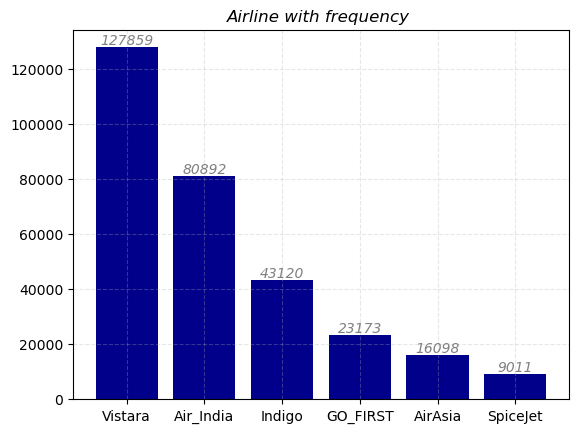

In [14]:
counts=df['airline'].value_counts()

plt.bar(counts.index,counts.values,color="darkblue")

plt.title("Airline with frequency ",fontstyle="italic")
plt.grid(True,linestyle="--",alpha=0.3)
for index,value in enumerate(counts.values):
    plt.text(index,value+5,str(value),ha="center",va="bottom",color="grey",fontstyle="italic")
plt.show()

Bar Graphs representing the Departure Time & Arrival Time


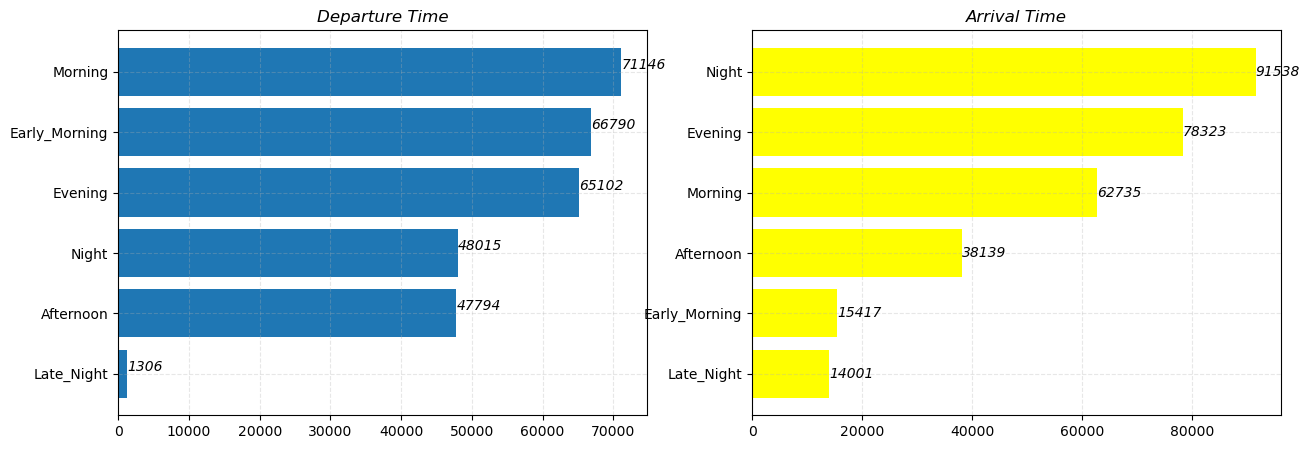

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
dept_count=df['departure_time'].value_counts(ascending=True)
plt.barh(dept_count.index,dept_count.values)
plt.grid(True,linestyle="--",alpha=0.3)
for i,values in enumerate(dept_count.values):
    plt.text(values,i,str(values),va="bottom",fontstyle="italic")
plt.title("Departure Time",fontstyle="italic")

plt.subplot(1, 2, 2)
dept_c=df['arrival_time'].value_counts(ascending=True)
plt.barh(dept_c.index,dept_c.values,color=['yellow'])
plt.grid(True,linestyle="--",alpha=0.3)
plt.title("Arrival Time",fontstyle="italic")
for i ,val in enumerate(dept_c.values):
    plt.text(val+3,i,str(val),va="center",fontstyle="italic")

plt.show()

Represnet the source city and destination city distribution

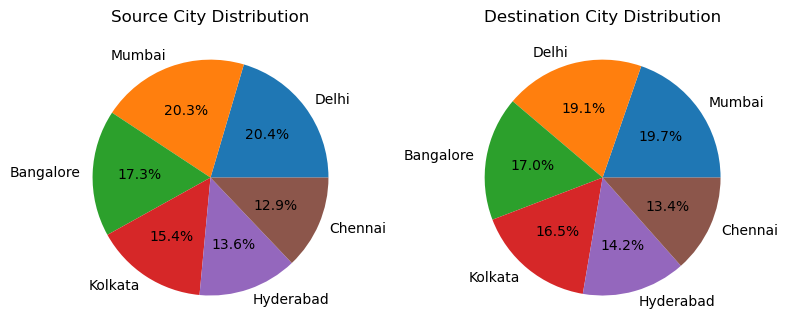

In [44]:
plt.figure(figsize=(8,4)) 
x_count = df['source_city'].value_counts()
plt.subplot(1, 2, 1) 
plt.pie(x_count.values, labels=x_count.index, autopct="%1.1f%%")
plt.title("Source City Distribution")
x_counts = df['destination_city'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(x_counts.values, labels=x_counts.index, autopct="%1.1f%%")
plt.title("Destination City Distribution")

plt.tight_layout() 
plt.show()


Does price varies with airlines

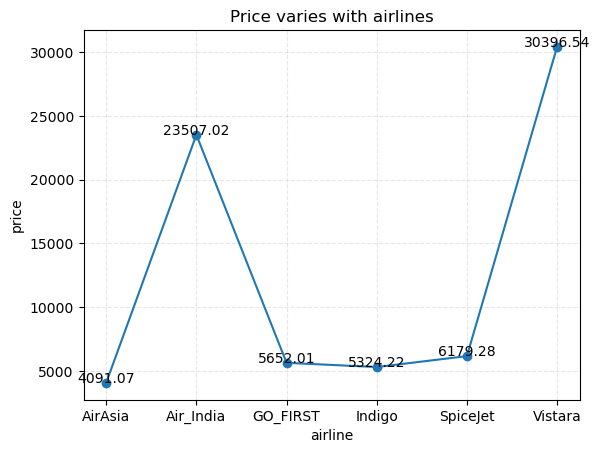

In [118]:
air_price=df.groupby('airline')['price'].mean().reset_index()
plt.plot(air_price['airline'],air_price['price'],marker="o")
for i,price in enumerate(air_price.price):
    plt.text(i,price+5,round((price),2),ha="center")
plt.grid(True,linestyle="--",alpha=0.3)
plt.xlabel("airline")
plt.ylabel("price")
plt.title("Price varies with airlines")
plt.show()


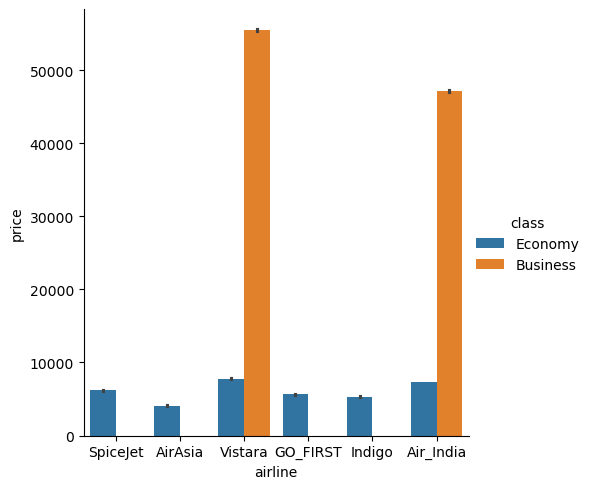

In [159]:
sns.catplot(x="airline",y="price",kind="bar",data=df,hue="class")
plt.show()

relation blw stops and during based on the airline

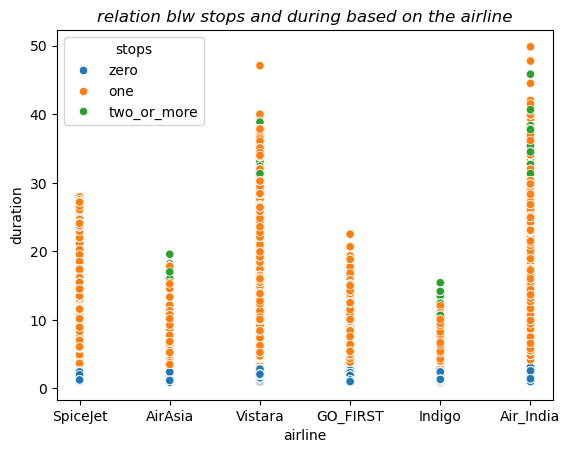

In [123]:
sns.scatterplot(data=df,x="airline",y="duration",hue="stops")
plt.title("relation blw stops and during based on the airline",fontstyle="italic")
plt.show()

Does ticket price change based on the departure time and arrival time

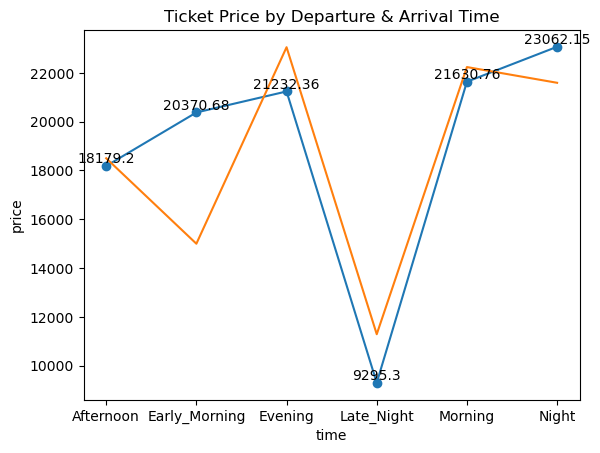

In [183]:

arr=df.groupby('arrival_time')['price'].mean().reset_index()
arr_tme=df.groupby('departure_time')['price'].mean().reset_index()
plt.plot(arr_tme['departure_time'],arr_tme['price'].values,marker="o")
for i,price in enumerate(arr_tme['price']):
    plt.text(i,price+5,round(price,2),ha="center",va="bottom")
arr=df.groupby('arrival_time')['price'].mean().reset_index()
plt.plot(arr['arrival_time'],arr['price'].values)
plt.xlabel("time")
plt.ylabel("price")
plt.title("Ticket Price by Departure & Arrival Time")

plt.show()

 How is the price affected when tickets are bought in just 1 or 2 days before departure

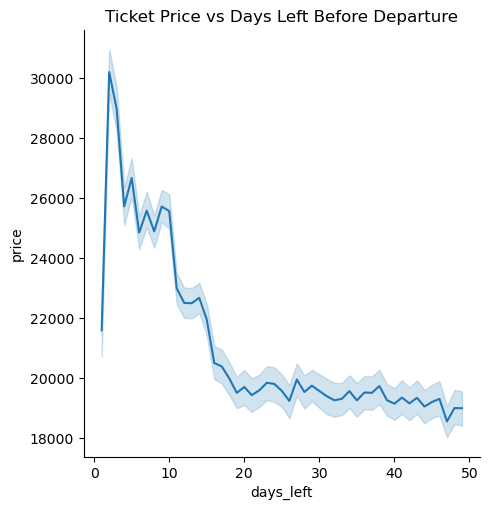

In [191]:
sns.relplot( x='days_left', y='price',kind="line",data=df)
plt.title("Ticket Price vs Days Left Before Departure")

plt.show()